Para aplicar aumento de datos a nuestra base de datos, existen diferentes formas:

* ImageDataGenerator
* tf.Image
* Liberías externas como *albumentations*, *imaug*...

Dada la versatilidad que ofrece (se puede integrar tanto en Tensorflow como en PyTorch) vamos a trabajar con la libería [albumentations](https://albumentations.ai/) donde encontramos una amplia [lista de transformaciones](https://albumentations.ai/docs/getting_started/transforms_and_targets/) que se pueden aplicar.

Google Colab tiene instalada la libería, sin embargo, en una versión antigua (0.1.12). Por ello, vamos a instalar de nuevo la libería.

In [ ]:
!pip install -q -U albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 3.8 MB/s eta 0:00:00


In [ ]:
!pip install git+https://github.com/mjkvaak/ImageDataAugmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/mjkvaak/ImageDataAugmentor to /tmp/pip-req-build-7dum_dru
  Running command git clone --filter=blob:none --quiet https://github.com/mjkvaak/ImageDataAugmentor /tmp/pip-req-build-7dum_dru
  Resolved https://github.com/mjkvaak/ImageDataAugmentor to commit 9f16ebd3e667cc16cde49f1ec1e5211e7962cd5c
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.7/116.7 kB 7.0 MB/s eta 0:00:00
  Created wheel for ImageDataAugmentor: filename=ImageDataAugmentor-0.0.0-py3-none-any.whl size=29644 sha256=48c3f9a987536ac867fc30e27ba0db0765249fcf5e08784757428290bd006242
  Stored in directory: /tmp/pip-ephem-wheel-cache-mayjo9fn/wheels/ee/c3/26/6cefd4fe733e9705316bded4d547fb712756ca33c2cba872ce
Successfully built ImageDataAugmentor
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.3.0
    Uninstalling albumen

In [ ]:
! pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.6 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import tensorflow as tf

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

import albumentations as A
from ImageDataAugmentor.image_data_augmentor import *


In [ ]:
# Selecciona una de las dos opciones siguientes

# 1. Trabajar en una carpeta en Google Drive
'''
from google.colab import drive
drive.mount('/content/drive')

# Adaptar a la carpeta que queráis de Google Drive
root_path = 'drive/My Drive/mislata_ia_imagenes/'
'''

# 2. Trabajar en local en Colab
root_path = '/content'

# Aumento de datos en una imagen

Primero vamos a hacer pruebas aplicando transformaciones a una única imagen.

In [ ]:
# Importamos librerías para interactuar con Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Nos autenticamos con nuestra cuenta de Google Drive para acceder a los datos
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Nos descargamos las imagenes que vamos a emplear
download = drive.CreateFile({'id': '1HengufnWV3CQ3Co12_nNvcMDCR1MZwEK'})
download.GetContentFile('perro.jpeg')

(-0.5, 2559.5, 1724.5, -0.5)

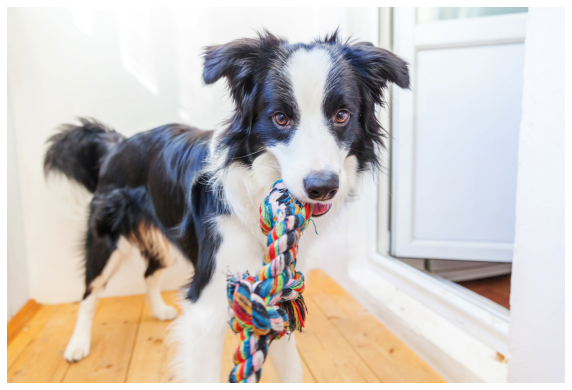

In [ ]:
# Cargamos la imagen
img = Image.open('perro.jpeg')
img = np.array(img)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')

Vemos un ejemplo de como aplicar un **giro horizontal** a la imagen.

(-0.5, 2559.5, 1724.5, -0.5)

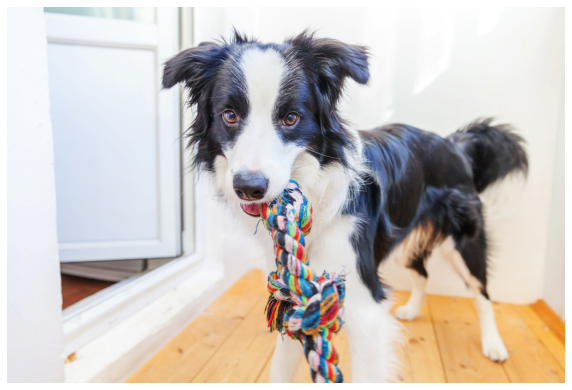

In [ ]:
transform = A.Compose([
    A.HorizontalFlip(p=1.0)
])
augmented_image = transform(image=img)['image']

plt.figure(figsize=(10,10))
plt.imshow(augmented_image)
plt.axis('off')

Vemos que en el método HorizontalFlip, hay un argumento p. Este se encuentra para la mayoría de las transformaciones y define la probabilidad con la que se aplica dicha transformación. Donde una probabilidad de 0 hará que no se aplique nunca y una probabilidad de 1 hará que se aplique siempre.

Hay otras transformaciones que podemos establecer el límite de otros parámetros. Por ejemplo en el cambio del brillo y el contraste.

Ejecuta la siguiente celda múltiples veces. Verás que en cada ejecución la imagen es diferente. Esto permite crear, de una misma imagen, una gran cantidad de variaciones que harán que aumente la generalización del modelo y disminuya el sobreajuste ya que en cada época la red "ve" imágenes diferentes.

(-0.5, 2559.5, 1724.5, -0.5)

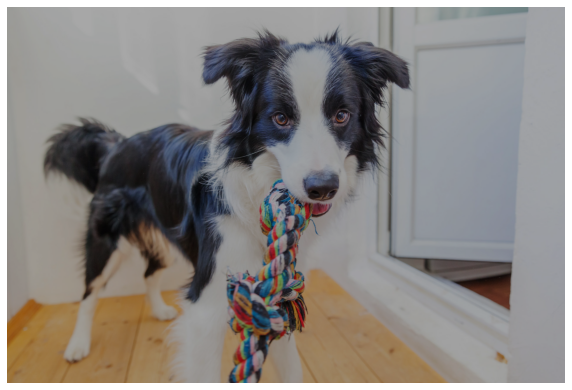

In [ ]:
transform = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=0.5, contrast_limit=1, p=1.0),
])
augmented_image = transform(image=img)['image']

plt.figure(figsize=(10,10))
plt.imshow(augmented_image)
plt.axis('off')

También podemos combinar múltiples transformaciones.

(-0.5, 2559.5, 1724.5, -0.5)

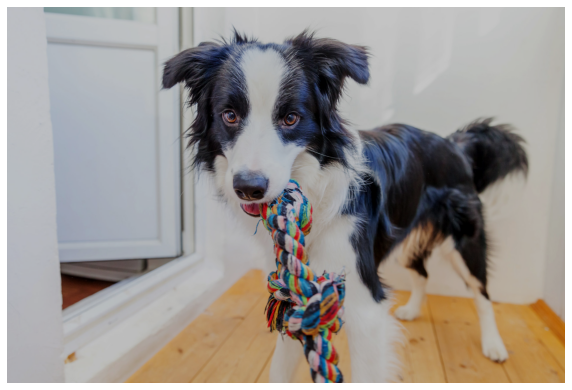

In [ ]:
transform = A.Compose([
    A.HorizontalFlip(p=0.6),
    A.RandomBrightnessContrast(brightness_limit=0.5, contrast_limit=0.5, p=1.0),
])
augmented_image = transform(image=img)['image']

plt.figure(figsize=(10,10))
plt.imshow(augmented_image)
plt.axis('off')

Observa que hemos bajado la probabilidad del giro horizontal. Ejecuta varias veces la siguiente celda. Verás que cada vez la imagen aparece con una brillo/contraste diferente y en ocasiones aparecerá girada y otras no.

## Ejercicio 1

Implementa una rutina de aumento de datos que haga lo siguiente:


* Giro horizontal con una probabilidad de 0.5
* Giro vertical con una probabilidad de 0.2
* Rotación de la imagen con un ángulo límite de 45º y con una probabilidad de 0.8
* Cambio de brillo y contraste con un contraste máximo de 0.8 y un brillo máximo de 0.8 y una probabilidad de 0.5
* Transformación CLAHE con una probabilidad de 0.5

Una vez implementada visualiza varias transformaciones.

NOTA: Ayúdate de la [documentación de albumentations](https://albumentations.ai/docs/getting_started/transforms_and_targets/). Los parámetros que no se han especificado toman sus valores por defecto.



In [ ]:
# TO DO

(-0.5, 2559.5, 1724.5, -0.5)

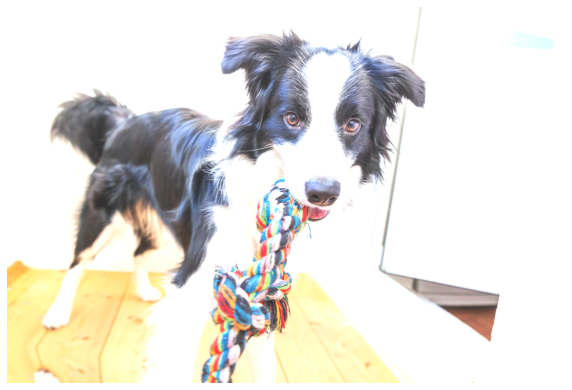

In [ ]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Rotate(limit=45, p=0.8),
    A.RandomBrightnessContrast(brightness_limit=0.8, contrast_limit=0.8, p=0.5),
    A.CLAHE(p=0.5)
])

augmented_image = transform(image=img)['image']

plt.figure(figsize=(10,10))
plt.imshow(augmented_image)
plt.axis('off')

# Aumento de datos durante el entrenamiento

Ahora vamos a ver como podemos emplear la libería Albumentations para aplicar aumento de datos durante el proceso de entrenamiento.

En primer lugar, vamos a entrenar un modelo sin hacer uso de aumento de datos para ver la comparativa.
Vamos a volver a hacer uso de la base de datos de clasificación de tipos de flores.

## Entrenamiento sin aumento de datos

In [ ]:
# Descargamos la base de datos
data_root = tf.keras.utils.get_file(
  'flower_photos',
  'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)

228813984/228813984 [==============================] - 6s 0us/step


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_dataset = image_dataset_from_directory(data_root,
                                             validation_split=0.2,
                                             subset="training",
                                             seed=123,
                                             image_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE)

validation_dataset = image_dataset_from_directory(data_root,
                                                  validation_split=0.2,
                                                  subset="validation",
                                                  seed=123,
                                                  image_size=IMG_SIZE,
                                                  batch_size=BATCH_SIZE)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)

def get_model():
  input = layers.Input(shape=IMG_SHAPE)
  preprocessing = layers.experimental.preprocessing.Rescaling(1./255)(input)
  x = layers.Conv2D(16, 3, padding='same', activation='relu')(preprocessing)
  x = layers.MaxPooling2D()(x)
  x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
  x = layers.MaxPooling2D()(x)
  x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
  x = layers.MaxPooling2D()(x)
  x = layers.Flatten()(x)
  x = layers.Dense(128, activation='relu')(x)
  output = layers.Dense(5, 'softmax')(x)

  model = Model(inputs=[input], outputs=[output])

  return model

In [ ]:
model_no_data_aug = get_model()

model_no_data_aug.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                         

In [ ]:
path_models = os.path.join(root_path, 'flowers_data_aug')

if not os.path.exists(path_models):
  os.mkdir(path_models)

path_experiment = os.path.join(path_models, 'Train1')

if not os.path.exists(path_experiment):
  os.mkdir(path_experiment)

In [ ]:
model_no_data_aug.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
      filepath= os.path.join(path_experiment, 'flowers_no_data_aug.h5'),
      monitor='val_accuracy',
      mode='max',
      save_best_only=True,
      verbose=1)

history_no_data_aug = model_no_data_aug.fit(train_ds,
                                            epochs=10,
                                            validation_data=validation_ds,
                                            callbacks=[model_checkpoint],
                                            verbose=1)

np.save(os.path.join(path_experiment, 'history_no_aug.npy'), history_no_data_aug.history)

Epoch 1/10
92/92 [==============================] - ETA: 0s - loss: 1.2784 - accuracy: 0.4670
Epoch 1: val_accuracy improved from -inf to 0.58038, saving model to /content/flowers/models/Train2/flowers_no_data_aug.h5
92/92 [==============================] - 22s 99ms/step - loss: 1.2784 - accuracy: 0.4670 - val_loss: 1.0644 - val_accuracy: 0.5804
Epoch 2/10
92/92 [==============================] - ETA: 0s - loss: 0.9252 - accuracy: 0.6376
Epoch 2: val_accuracy improved from 0.58038 to 0.63215, saving model to /content/flowers/models/Train2/flowers_no_data_aug.h5
92/92 [==============================] - 9s 95ms/step - loss: 0.9252 - accuracy: 0.6376 - val_loss: 0.9418 - val_accuracy: 0.6322
Epoch 3/10
90/92 [============================>.] - ETA: 0s - loss: 0.7267 - accuracy: 0.7236
Epoch 3: val_accuracy did not improve from 0.63215
92/92 [==============================] - 7s 75ms/step - loss: 0.7292 - accuracy: 0.7217 - val_loss: 1.0294 - val_accuracy: 0.5790
Epoch 4/10
90/92 [=========

Text(0.5, 1.0, 'Exactitud sin aumento de datos')

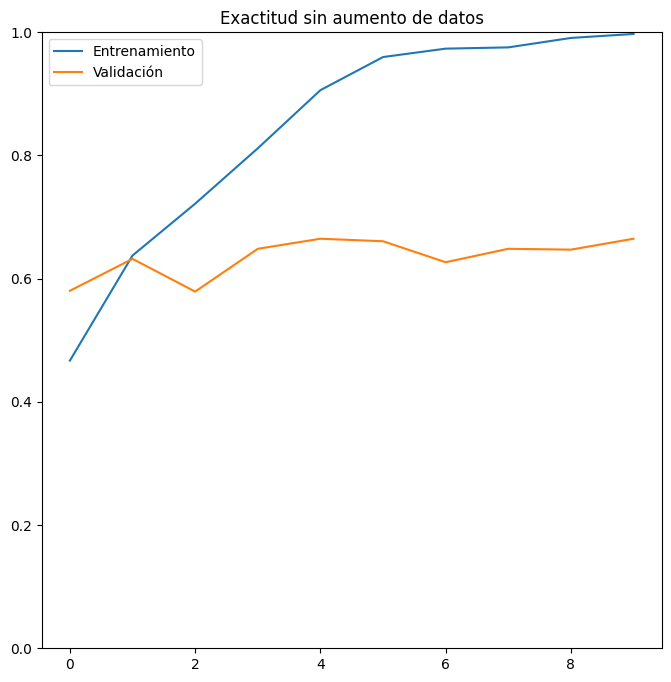

In [ ]:
# Visualizamos la precisión en entrenamiento y validación

plt.figure(figsize=(8,8))
plt.plot(history_no_data_aug.history['accuracy'], label='Entrenamiento')
plt.plot(history_no_data_aug.history['val_accuracy'], label='Validación')
plt.legend()
plt.ylim([0,1])
plt.title('Exactitud sin aumento de datos')

## Entrenamiento con aumento de datos

In [ ]:
# Implementamos la rutina de transformaciones
transforms = A.Compose([
                        A.Rotate(limit=40, p=0.5),
                        A.RandomBrightnessContrast(p=0.5),
                        A.HorizontalFlip(p=0.5)
                        ])

En este caso vamos a cargar las imágenes de manera ligeramente diferente a como lo estábamos haciendo ahora, haciendo uso del método "image_dataset_from_directory".
En este caso vamos a implementar unos generadores de datos, haciendo uso de la librería "ImageDataAugmentor" y, emplearemos estos generadores para cargar las imágenes durante el proceso de entrenamiento haciendo uso del método "flow_from_directory".

In [ ]:
# Generador de datos de entrenamiento
train_datagen = ImageDataAugmentor(
    augment=transforms,
    validation_split=0.2,
    seed=123)

# Generador de datos de validación --> ¡¡¡ No aplicamos aumento de datos !!!
val_datagen = ImageDataAugmentor(
    validation_split=0.2,
    seed=123)


In [ ]:
# Dataset de entrenamiento
train_dataset = train_datagen.flow_from_directory(
        data_root,
        subset="training",
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='sparse',
        shuffle=True)

# Dataset validación
validation_dataset = val_datagen.flow_from_directory(
        data_root,
        subset="validation",
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='sparse',
        shuffle=True)


Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


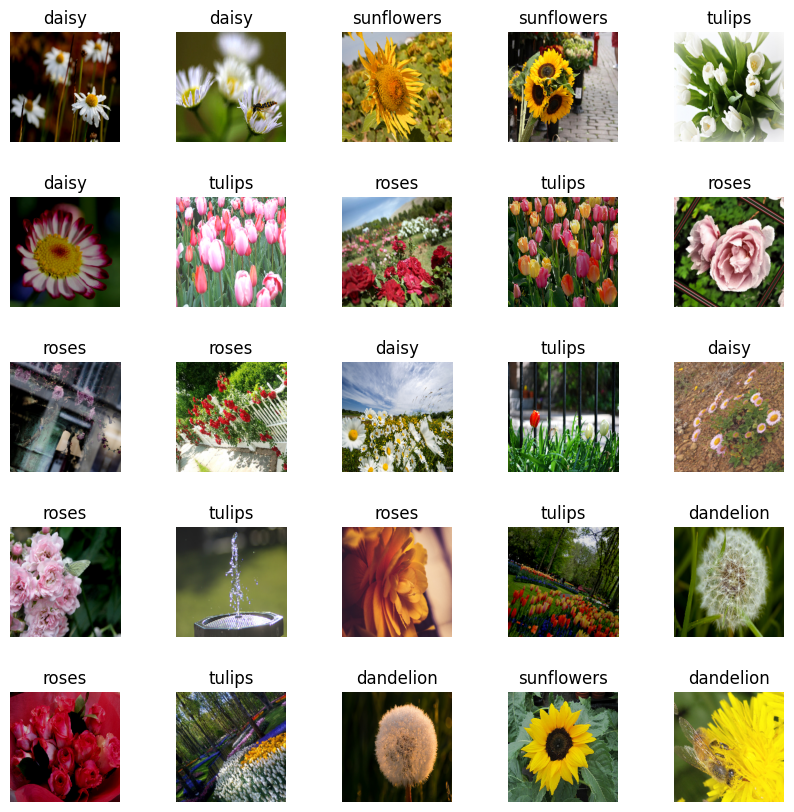

In [ ]:
# Visualizamos imágenes entrenamiento: con aumento de datos

train_dataset.show_data()

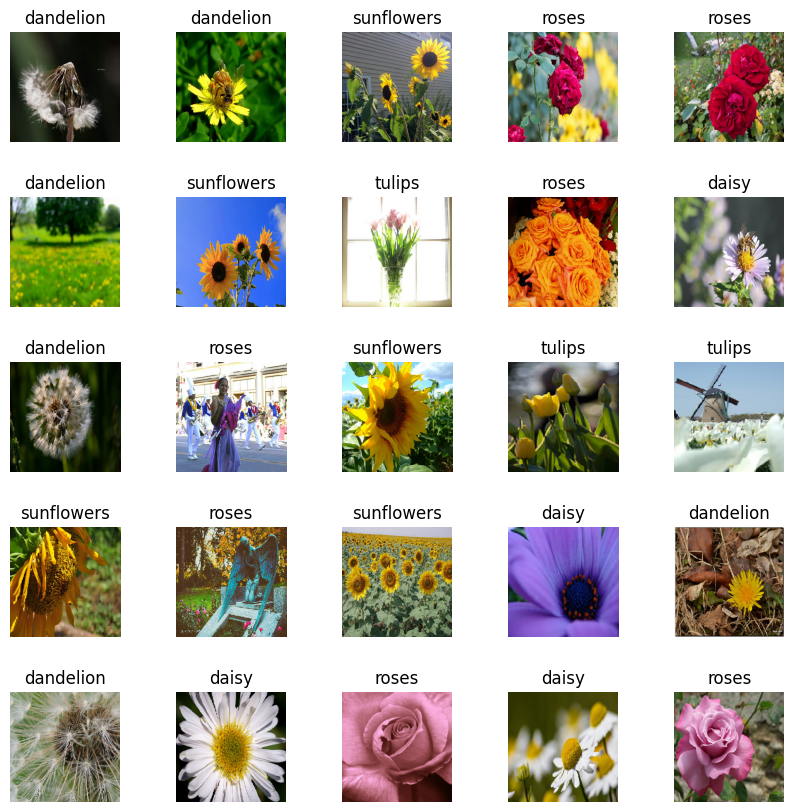

In [ ]:
# Visualizamos imágenes validación: sin aumento de datos

validation_dataset.show_data()

In [ ]:
model_data_aug = get_model()

model_data_aug.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                       

In [ ]:
# Carpeta donde vamos a guardar los resultados del entrenamiento
path_experiment = os.path.join(path_models, 'Train2')

if not os.path.exists(path_experiment):
  os.mkdir(path_experiment)

# Inicializamos el callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(path_experiment, 'flowers_data_aug.h5'),
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

model_data_aug.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

train_samples = train_dataset.n
validation_samples = validation_dataset.n

history_data_aug = model_data_aug.fit(train_dataset,
                                      steps_per_epoch = train_samples//BATCH_SIZE,
                                      epochs=10,
                                      validation_data=validation_dataset,
                                      validation_steps = validation_samples//BATCH_SIZE,
                                      callbacks=[model_checkpoint_callback],
                                      verbose=1)

np.save(os.path.join(path_experiment, 'history_aug.npy'), history_data_aug.history)

Epoch 1/10
91/91 [==============================] - ETA: 0s - loss: 0.6504 - accuracy: 0.7592
Epoch 1: val_accuracy improved from -inf to 0.67472, saving model to /content/flowers/models/Train3/flowers_data_aug.h5
91/91 [==============================] - 20s 194ms/step - loss: 0.6504 - accuracy: 0.7592 - val_loss: 0.8923 - val_accuracy: 0.6747
Epoch 2/10
91/91 [==============================] - ETA: 0s - loss: 0.6355 - accuracy: 0.7606
Epoch 2: val_accuracy improved from 0.67472 to 0.67898, saving model to /content/flowers/models/Train3/flowers_data_aug.h5
91/91 [==============================] - 15s 166ms/step - loss: 0.6355 - accuracy: 0.7606 - val_loss: 0.8783 - val_accuracy: 0.6790
Epoch 3/10
91/91 [==============================] - ETA: 0s - loss: 0.5946 - accuracy: 0.7805
Epoch 3: val_accuracy improved from 0.67898 to 0.69602, saving model to /content/flowers/models/Train3/flowers_data_aug.h5
91/91 [==============================] - 15s 165ms/step - loss: 0.5946 - accuracy: 0.780

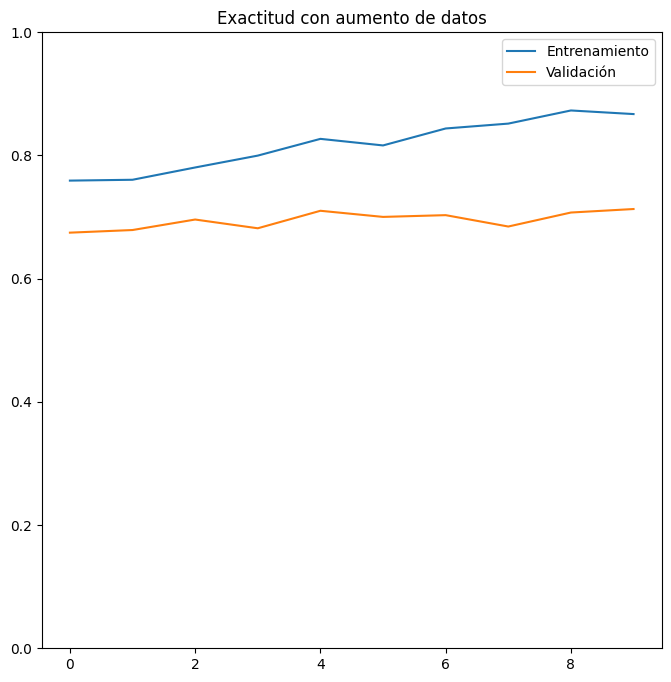

In [ ]:
# Visualizamos curvas de aprendizaje
plt.figure(figsize=(8, 8))
plt.plot(history_data_aug.history['accuracy'], label='Entrenamiento')
plt.plot(history_data_aug.history['val_accuracy'], label='Validación')
plt.title('Exactitud con aumento de datos')
plt.ylim([0,1])
plt.legend()

Vamos a comparar las gráficas obtenidas sin y con aumento de datos.

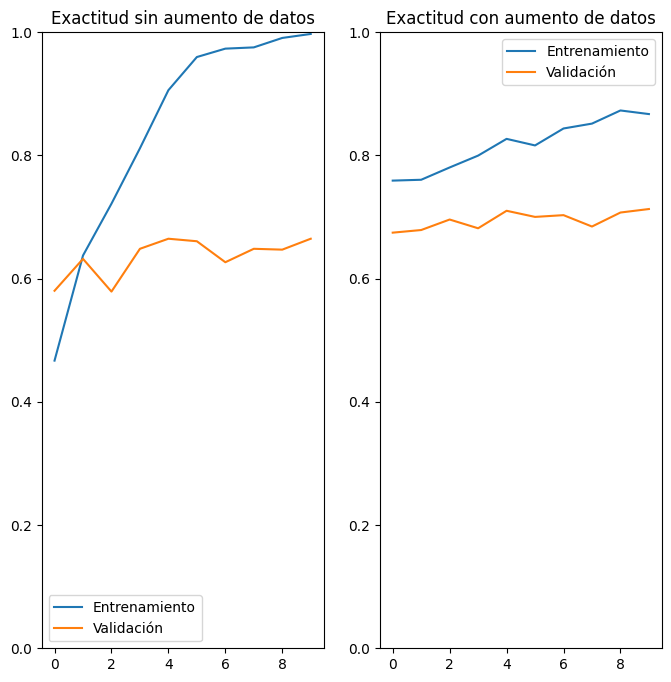

In [ ]:
plt.figure(figsize=(8, 8))

plt.subplot(1,2,1)
plt.plot(history_no_data_aug.history['accuracy'], label='Entrenamiento')
plt.plot(history_no_data_aug.history['val_accuracy'], label='Validación')
plt.title('Exactitud sin aumento de datos')
plt.ylim([0,1])
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_data_aug.history['accuracy'], label='Entrenamiento')
plt.plot(history_data_aug.history['val_accuracy'], label='Validación')
plt.title('Exactitud con aumento de datos')
plt.ylim([0,1])
plt.legend()

Podemos observar como, las curvas de aprendizaje en entrenamiento y validación son más próximas al aplicar aumento de datos. Esto significa que el sobreajuste se reduce. Por lo tanto, gracias al aumento de datos, el sobreajuste se disminuye considerablemente.

# EarlyStopping

Finalmente, vamos a ver otro callback que puede ser de gran interés a la hora de realizar el entrenamiento.

El número de épocas es un parámetro importante para evitar el subajuste (no entrenar durante el tiempo suficiente y, por tanto, el entrenamiento no llega a converger), y el sobreajuste (entrenar durante demasiado tiempo que los pesos se adaptan al conjunto de datos de entrenamiento y no es capaz de generalizar a nuevos datos).

Por ejemplo, en el modelo anterior, ¿podemos garantizar que el modelo ya ha llegado a la convergencia?

Para esto existe el callback [EarlyStopping](hthttps://keras.io/api/callbacks/early_stopping/tps://), que permite detener el entrenamiento tras un número determinado de épocas sin mejoras en el conjunto de datos de validación.



In [ ]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                 mode="min", patience=5,
                                                 restore_best_weights=True,
                                                 verbose=1)

In [ ]:
# Implementamos arquitectura
model_early_stopping = get_model()

# Carpeta donde vamos a guardar los resultados del entrenamiento
path_experiment = os.path.join(path_models, 'Train3')
if not os.path.exists(path_experiment):
  os.mkdir(path_experiment)

# Inicializamos el callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(path_experiment, 'flowers_early.h5'),
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

model_early_stopping.compile(optimizer='adam',
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])

history_early = model_early_stopping.fit(train_dataset,
                                           epochs=20,
                                           validation_data=validation_dataset,
                                           callbacks=[model_checkpoint_callback, earlystopping],
                                           verbose=1)

np.save(os.path.join(path_experiment, 'history_early.npy'), history_early.history)

Epoch 1/20
92/92 [==============================] - ETA: 0s - loss: 1.4017 - accuracy: 0.4328
Epoch 1: val_accuracy improved from -inf to 0.52668, saving model to drive/My Drive/mislata_ia_imagenes/flowers/models/Train4/flowers_early.h5
92/92 [==============================] - 15s 154ms/step - loss: 1.4017 - accuracy: 0.4328 - val_loss: 1.3723 - val_accuracy: 0.5267
Epoch 2/20
92/92 [==============================] - ETA: 0s - loss: 1.0434 - accuracy: 0.5893
Epoch 2: val_accuracy improved from 0.52668 to 0.59644, saving model to drive/My Drive/mislata_ia_imagenes/flowers/models/Train4/flowers_early.h5
92/92 [==============================] - 14s 153ms/step - loss: 1.0434 - accuracy: 0.5893 - val_loss: 1.0474 - val_accuracy: 0.5964
Epoch 3/20
92/92 [==============================] - ETA: 0s - loss: 0.9702 - accuracy: 0.6284
Epoch 3: val_accuracy improved from 0.59644 to 0.64432, saving model to drive/My Drive/mislata_ia_imagenes/flowers/models/Train4/flowers_early.h5
92/92 [============

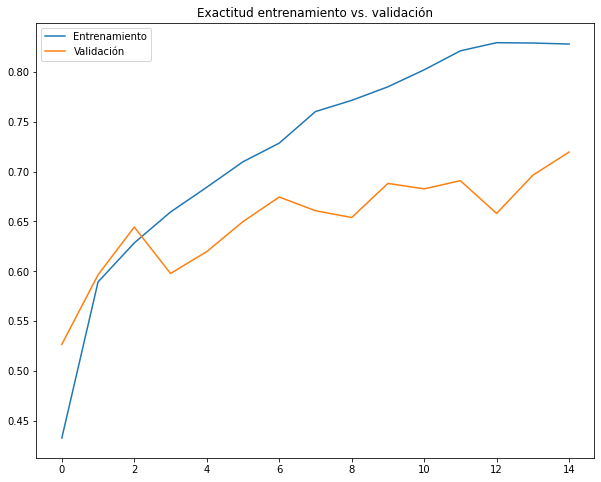

In [ ]:
# Visualizamos curvas de aprendizaje
plt.figure(figsize=(10, 8))
plt.plot(history_early.history['accuracy'], label='Entrenamiento')
plt.plot(history_early.history['val_accuracy'], label='Validación')
plt.title('Exactitud entrenamiento vs. validación')
plt.legend()

# Ejercicio 2

Realiza el mismo entrenamiento pero, en esta ocasión, realizando también transferencia de conocimiento.

In [ ]:
# TO DO